In [27]:
#Imports
import pandas as pd

In [28]:
# Load the Files
sample_submission = pd.read_csv('./spaceship-titanic/sample_submission.csv')
test = pd.read_csv('./spaceship-titanic/test.csv')
train = pd.read_csv('./spaceship-titanic/train.csv')

In [29]:
# Test the File Imports
print("Sample Submission:")
print(sample_submission.head())
print("Test:")
print(test.head())
print("Train:")
print(train.head())

Sample Submission:
  PassengerId  Transported
0     0013_01        False
1     0018_01        False
2     0019_01        False
3     0021_01        False
4     0023_01        False
Test:
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4     

In [30]:
# Copying Data
train_clean = train.copy()
test_clean = test.copy()

In [31]:
# Getting Simple data and Simplifying it

In [32]:
train_clean['HomePlanet'].value_counts(normalize=True)

HomePlanet
Earth     0.541922
Europa    0.250942
Mars      0.207136
Name: proportion, dtype: float64

In [33]:
train_clean['CryoSleep'].value_counts(normalize=True)

CryoSleep
False    0.641694
True     0.358306
Name: proportion, dtype: float64

In [34]:
train_clean['Destination'].value_counts(normalize=True)

Destination
TRAPPIST-1e      0.694983
55 Cancri e      0.211491
PSO J318.5-22    0.093526
Name: proportion, dtype: float64

In [35]:
train_clean['VIP'].value_counts(normalize=True)

VIP
False    0.976561
True     0.023439
Name: proportion, dtype: float64

In [36]:
# Fill NaN(Booleans) of Boolean Data
train_clean.isna().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [37]:
# Filling Nan(Booleans) as Unknown then making it as -1
fill_nan_cols = ['CryoSleep', 'VIP', 'Transported']

for col in fill_nan_cols:
    train_clean[col] = train_clean[col].fillna('Unknown')
    train_clean[col] = train_clean[col].map({True: 1, False: 0, 'Unknown': -1})

In [38]:
# Fill NaN(Strings) Cols for HomePlanet
fill_nan_cols = ['HomePlanet','Destination']

for col in fill_nan_cols:
    train_clean[col] = train_clean[col].fillna('Unknown')

train_clean = pd.get_dummies(train_clean,columns=fill_nan_cols,drop_first=True)

In [39]:
# Check Tables
train_clean.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
0,0001_01,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,True,False,False,False,True,False
1,0002_01,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,False,False,False,False,True,False
2,0003_01,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,True,False,False,False,True,False
3,0003_02,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,True,False,False,False,True,False
4,0004_01,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,False,False,False,False,True,False


In [40]:
# Check NaN
train_clean.isna().sum().sort_values(ascending=False)

ShoppingMall                 208
Name                         200
Cabin                        199
VRDeck                       188
FoodCourt                    183
Spa                          183
RoomService                  181
Age                          179
HomePlanet_Mars                0
Destination_TRAPPIST-1e        0
Destination_PSO J318.5-22      0
HomePlanet_Unknown             0
PassengerId                    0
HomePlanet_Europa              0
Transported                    0
CryoSleep                      0
VIP                            0
Destination_Unknown            0
dtype: int64

In [41]:
# Fill Price Values
fill_nan_cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

for col in fill_nan_cols:
    train_clean[col] = train_clean[col].fillna(0)

In [42]:
# Check NaN
train_clean.isna().sum().sort_values(ascending=False)

Name                         200
Cabin                        199
Age                          179
PassengerId                    0
Destination_TRAPPIST-1e        0
Destination_PSO J318.5-22      0
HomePlanet_Unknown             0
HomePlanet_Mars                0
HomePlanet_Europa              0
Transported                    0
VRDeck                         0
CryoSleep                      0
Spa                            0
ShoppingMall                   0
FoodCourt                      0
RoomService                    0
VIP                            0
Destination_Unknown            0
dtype: int64

In [43]:
# Age Median
train_clean['Age'] = train_clean['Age'].fillna(
    train_clean['Age'].median()
)

In [44]:
# Treat Cabin
train_clean['Cabin'] = train_clean['Cabin'].fillna(
    'Unknown/Unknown/Unknown'
)
train_clean[['Deck', 'CabinNum', 'Side']] = (
    train_clean['Cabin'].str.split('/', expand=True)
)
train_clean.drop(columns=['Cabin'], inplace=True)

In [45]:
# Convert CabinNum
train_clean['CabinNum'] = pd.to_numeric(
    train_clean['CabinNum'], errors='coerce'
)

train_clean['CabinNum'] = train_clean['CabinNum'].fillna(
    train_clean['CabinNum'].median()
)

In [46]:
train_clean = pd.get_dummies(
    train_clean,
    columns=['Deck', 'Side'],
    drop_first=True
)

In [47]:
# Name Dropping
train_clean.drop(columns=['Name'], inplace=True)

In [48]:
train_clean.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown,Side_S,Side_Unknown
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,...,True,False,False,False,False,False,False,False,False,False
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,...,False,False,False,False,True,False,False,False,True,False
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,...,False,False,False,False,False,False,False,False,True,False
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,...,False,False,False,False,False,False,False,False,True,False
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,...,False,False,False,False,True,False,False,False,True,False


In [49]:
train_clean.isna().sum().sort_values(ascending=False)

PassengerId                  0
Destination_TRAPPIST-1e      0
Side_S                       0
Deck_Unknown                 0
Deck_T                       0
Deck_G                       0
Deck_F                       0
Deck_E                       0
Deck_D                       0
Deck_C                       0
Deck_B                       0
CabinNum                     0
Destination_Unknown          0
Destination_PSO J318.5-22    0
CryoSleep                    0
HomePlanet_Unknown           0
HomePlanet_Mars              0
HomePlanet_Europa            0
Transported                  0
VRDeck                       0
Spa                          0
ShoppingMall                 0
FoodCourt                    0
RoomService                  0
VIP                          0
Age                          0
Side_Unknown                 0
dtype: int64

In [50]:
# Binary Classification
y = train_clean['Transported'] # Training Results
X = train_clean.drop(columns=['Transported', 'PassengerId']) # Testing Input

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [52]:
train_clean.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown,Side_S,Side_Unknown
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,...,True,False,False,False,False,False,False,False,False,False
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,...,False,False,False,False,True,False,False,False,True,False
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,...,False,False,False,False,False,False,False,False,True,False
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,...,False,False,False,False,False,False,False,False,True,False
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,...,False,False,False,False,True,False,False,False,True,False


In [53]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/home/janish/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [54]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.7901092581943646
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       863
           1       0.78      0.81      0.80       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [55]:
import pandas as pd

feature_importance = pd.Series(
    model.coef_[0],
    index=X.columns
).sort_values(key=abs, ascending=False)

feature_importance.head(10)

HomePlanet_Europa            1.675446
Deck_C                       1.141962
CryoSleep                    1.069713
HomePlanet_Mars              0.648973
Deck_B                       0.635280
Deck_E                      -0.619832
Side_S                       0.536957
Deck_G                      -0.434764
Destination_PSO J318.5-22   -0.407437
Destination_TRAPPIST-1e     -0.389607
dtype: float64

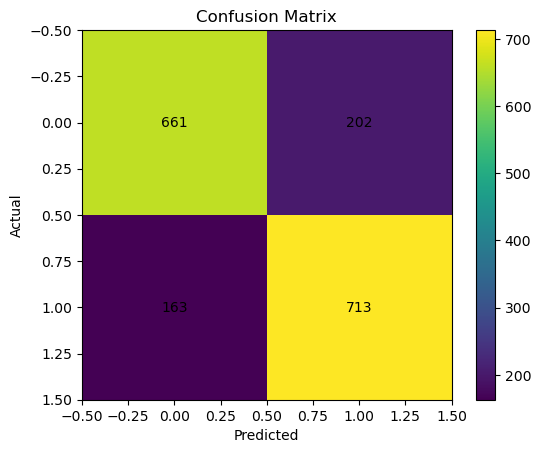

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_pred = model.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

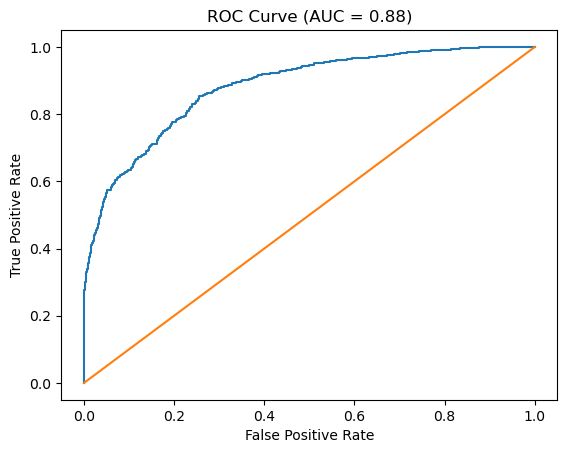

In [57]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc:.2f})")
plt.show()